In [1274]:
#For inline plots:
%matplotlib inline
#to be able to interact with the plots:
#%matplotlib nbagg

In [1275]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py
import pytpc
from mpl_toolkits.mplot3d import Axes3D

# NOTE: 
## This jupyter notebook only includes old methods of hit detection, non of which are currently used

### manually change the event number and threshold value

In [1285]:
#list of event names to extract data for each event from the h5 file
events = []
for i in range(1,75): 
    events.append('get/'+str(i))

In [1454]:
# eventnum for the event desired, theshold for the charge threshold desired
eventnum = 1
threshold = 50

In [1455]:
with pytpc.HDFDataFile('corrected_run_0210.h5', 'r') as events:
    event = events[eventnum]
    xyzs1 = event.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)

In [1456]:
eventtrace = np.ndarray(10240, dtype=object)    #list to hold arrays of trace for each pad
event = 'get/'+str(eventnum)    #the specified eventnum at the beggining of the process
with h5py.File('corrected_run_0210.h5', 'r') as f:
    dset = f[event]                                   
    trace = dset[:,10:510]        
    for i in range(len(dset)):                          #i from 0 to 10240 for each pad
        y = np.zeros(len(trace[0]))
        padnumber = dset[i,4]                           #pad number of trace
        currentpad = trace[i]                           #select pad from dset 
        for j in range(len(trace[0])):
            y[j] = currentpad[j]
        eventtrace[padnumber] = y

In [1457]:
hitpeaks = [] 
for i in range(10240):
    trace = eventtrace[i]
    tracemax = np.amax(trace)
    tracemin = np.amin(trace)
    peaktimeindex = []
    if(tracemax - tracemin > threshold):   #the specified threshold at the beggining of the process
        for j in range(len(trace)):
            if(np.max(trace) == trace[j]):
                peaktimeindex.append(j+0.0)
        for k in range(len(peaktimeindex)):
            peaktime = peaktimeindex[k]
            hitpeaks.append([peaktime, tracemax, i + 0.0]) 
                             #  time     charge   padnumber
np.asarray(hitpeaks)

array([[3.720e+02, 5.960e+02, 0.000e+00],
       [3.700e+02, 4.520e+02, 1.000e+00],
       [3.710e+02, 5.060e+02, 9.000e+00],
       ...,
       [3.660e+02, 4.610e+02, 9.608e+03],
       [3.660e+02, 4.840e+02, 9.611e+03],
       [3.680e+02, 6.870e+02, 9.691e+03]])

In [1458]:
plotpoints = np.zeros(shape=(len(hitpeaks),4))
for i in range(len(hitpeaks)):
    hitpeaksPadNum = hitpeaks[i][2]
    for j in range(10240):
        xyzsPadNum = xyzs1[j][4]
        if(hitpeaksPadNum == xyzsPadNum):
            plotpoints[i][0] = xyzs1[j][0]      #x
            plotpoints[i][1] = xyzs1[j][1]      #y
            plotpoints[i][2] = hitpeaks[i][0]   #time
            plotpoints[i][3] = hitpeaks[i][1]   #charge

## 2-D

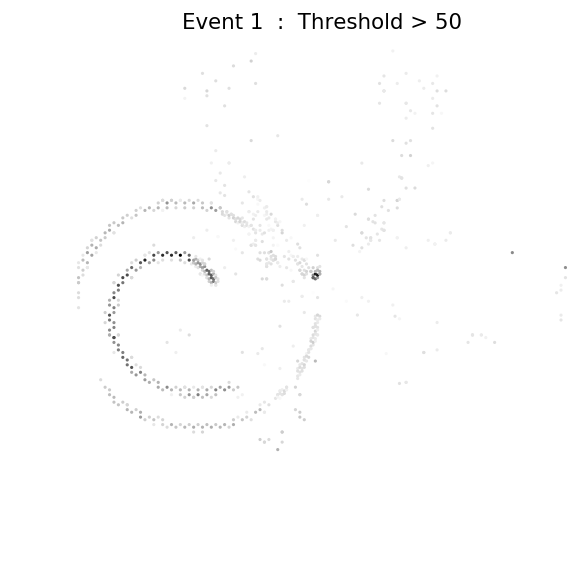

In [1461]:
x = plotpoints[:, 0]
y = plotpoints[:, 1]
charge = plotpoints[:,3]

fig = plt.figure(figsize=(5, 5), dpi=128)
plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
plt.axis('off')
#inverseGrayImage = uint8(255) - grayImage;
plt.scatter(x, y, c=charge, cmap='gray_r', s=0.6)
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold))
#plt.savefig("Graph" + str(event) +".png", format="PNG")
plt.show()

## 3-D plots

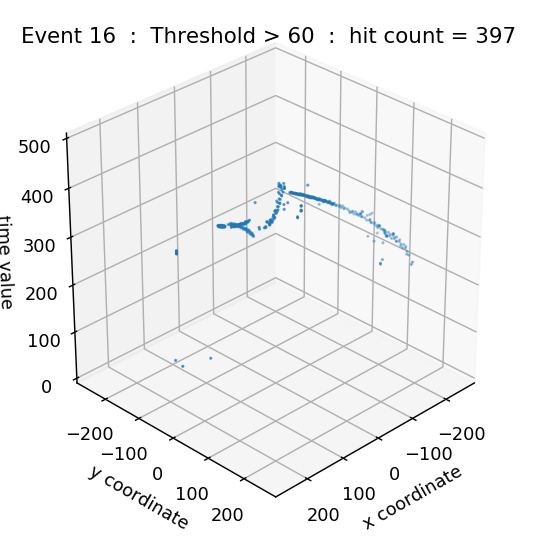

In [1167]:
x = plotpoints[:, 0]
y = plotpoints[:, 1]
time = plotpoints[:, 2]
hitpeakcounts = len(hitpeaks)

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)

plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
ax.set_zlim(0,500)
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('time value')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
#ax.axis('off')
ax.scatter(x, y, time, s=0.6)
ax.view_init(elev=30, azim=45)
plt.show()

## For a different perspective

In [1168]:
x = plotpoints[:, 0]
y = plotpoints[:, 1]
time = plotpoints[:, 2]
hitpeakcounts = len(hitpeaks)

In [1173]:
xlimlow, xlimhigh = 250, 400          #time value
ylimlow, ylimhigh = -275, 275       #x coordinate
zlimlow, zlimhigh = -275, 275       #y coordinate

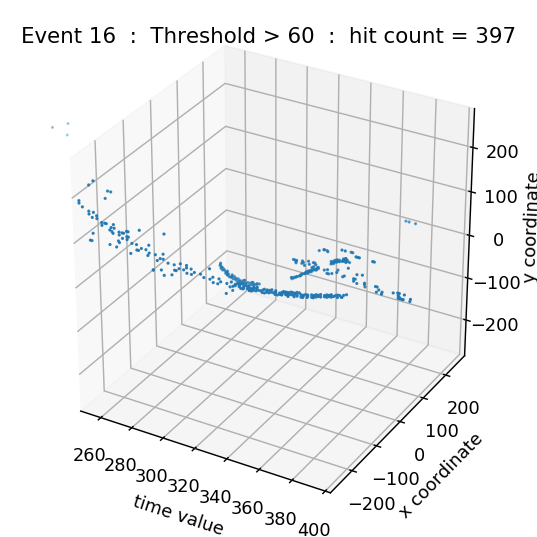

In [1174]:
fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
plt.show()

## For multiple different perspectives

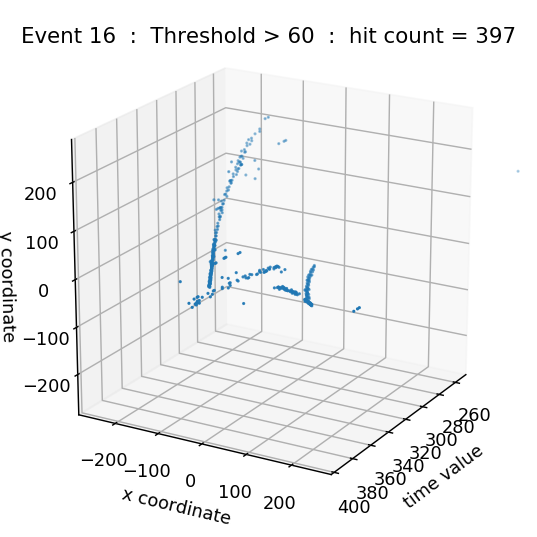

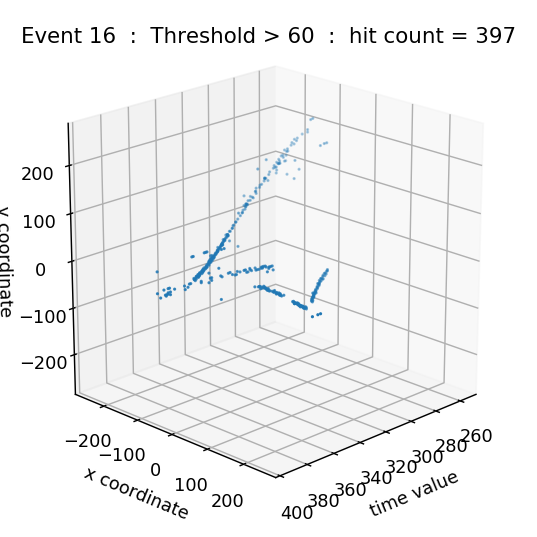

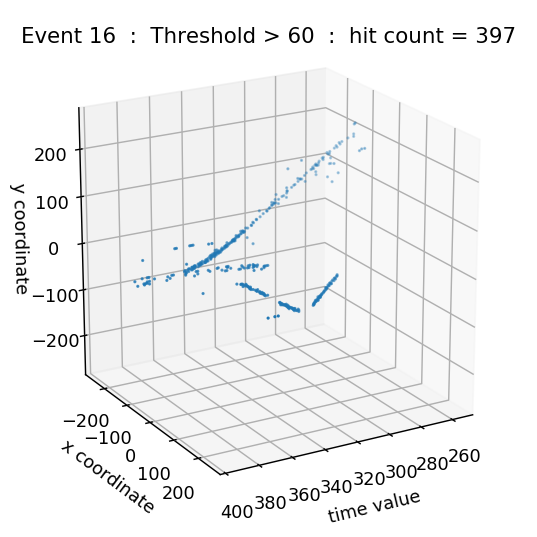

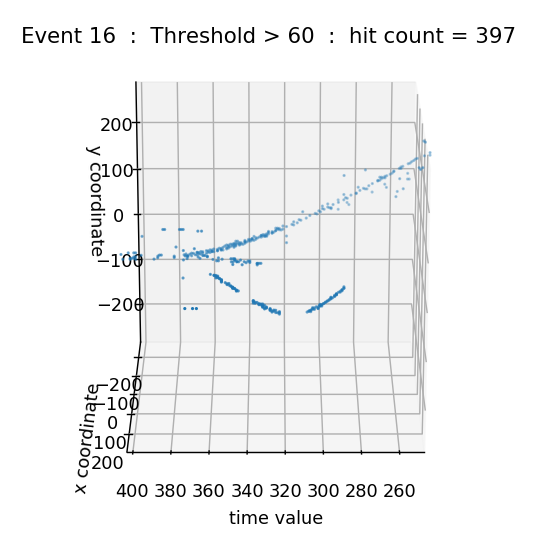

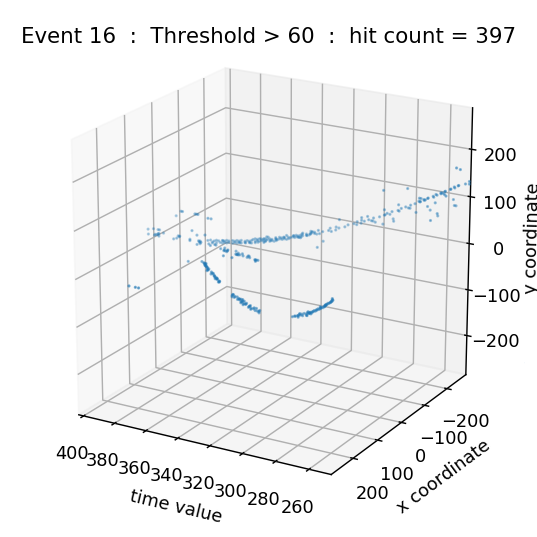

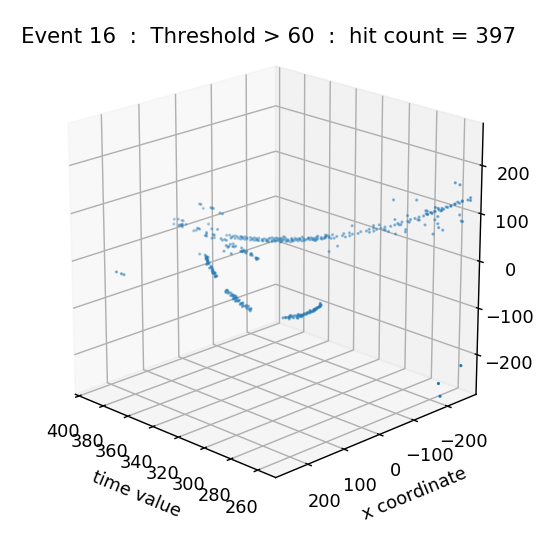

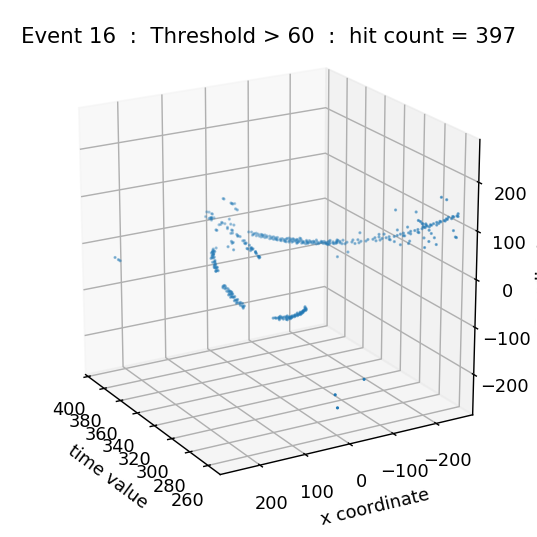

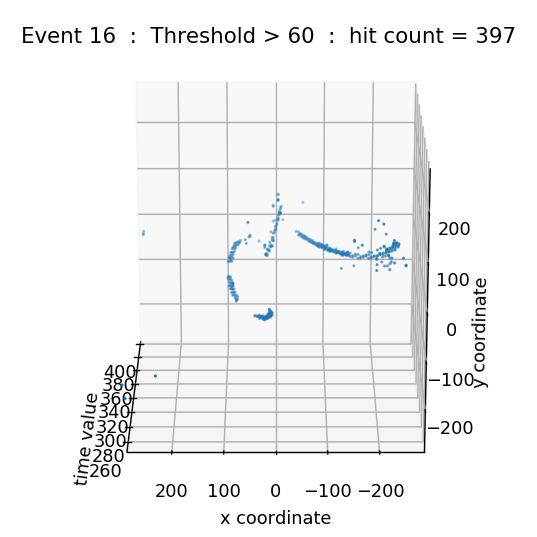

In [1175]:
fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=30)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=45)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=60)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=90)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=120)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=135)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=150)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=180)
plt.show()

# This is the same thing but all in one cell for quick plotting 

## manually change the values before the #### line

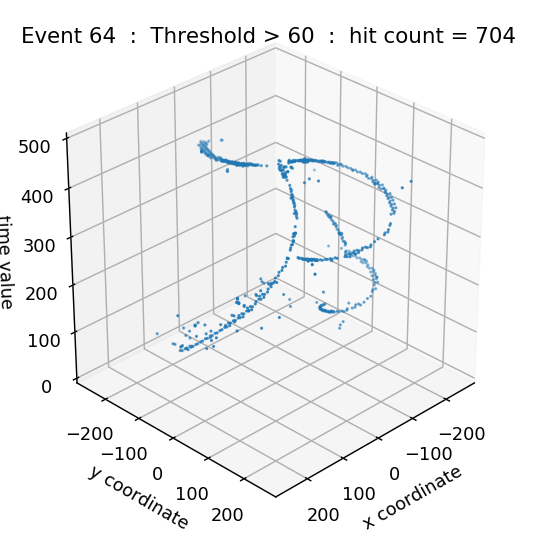

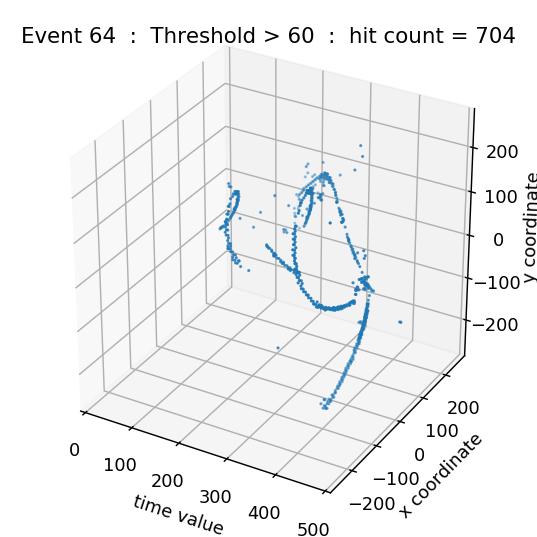

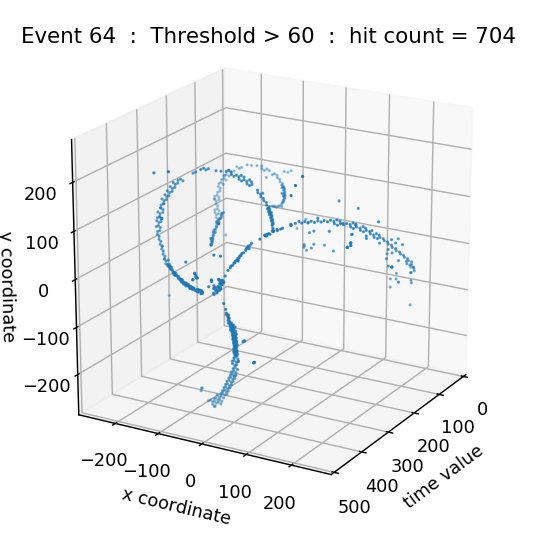

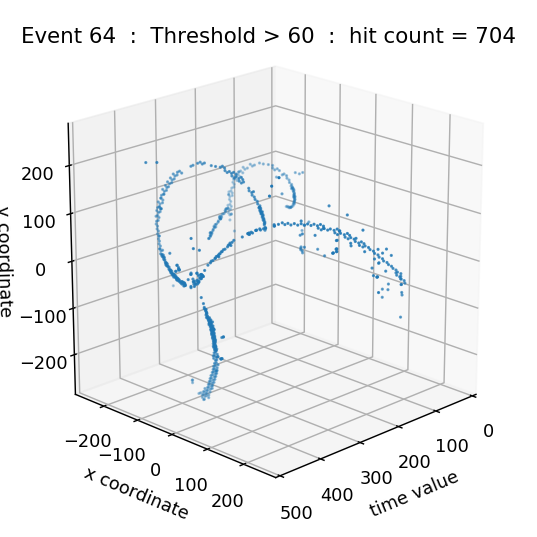

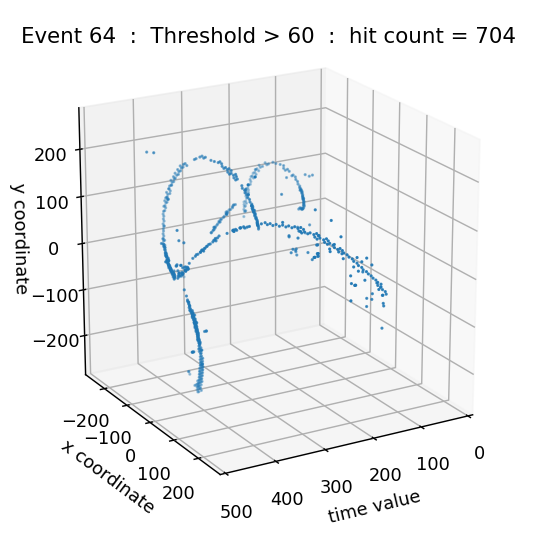

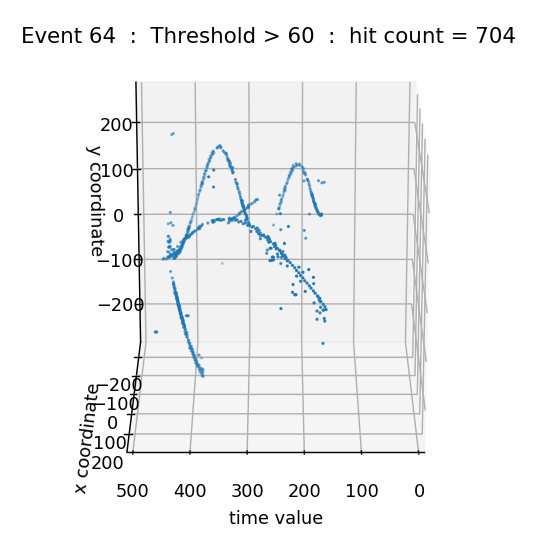

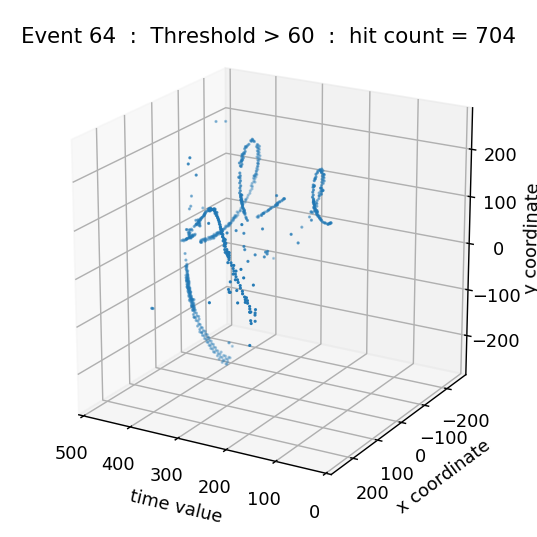

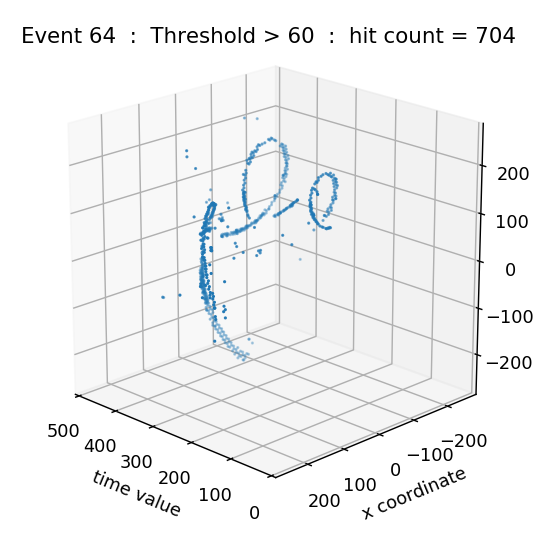

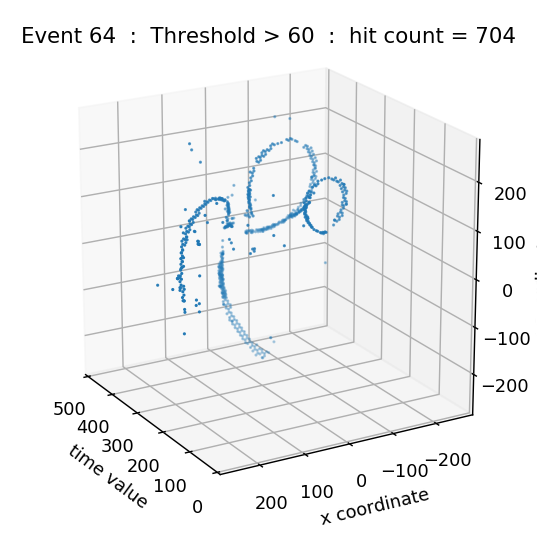

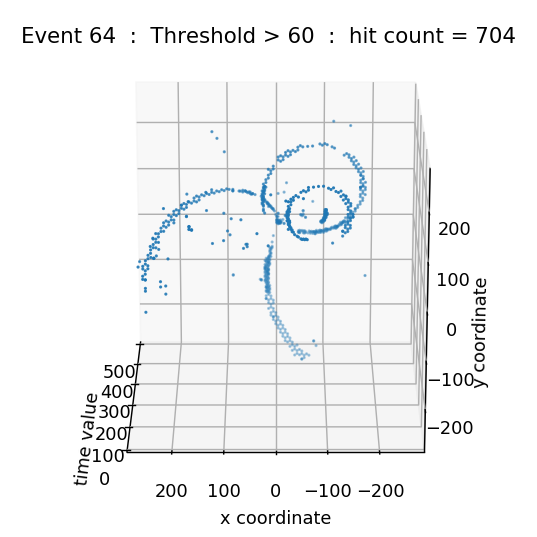

In [1266]:
eventnum = 64
threshold = 60

xlimlow, xlimhigh = 0, 500
ylimlow, ylimhigh = -275, 275
zlimlow, zlimhigh = -275, 275

###################################################################################################

with pytpc.HDFDataFile('corrected_run_0210.h5', 'r') as events:
    event = events[eventnum]
    xyzs1 = event.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)
    
eventtrace = np.ndarray(10240, dtype=object)    #list to hold arrays of trace for each pad
event = 'get/'+str(eventnum)    #the specified eventnum at the beggining of the process
with h5py.File('corrected_run_0210.h5', 'r') as f:
    dset = f[event]                                   
    trace = dset[:,10:510]        
    for i in range(len(dset)):                          #i from 0 to 10240 for each pad
        y = np.zeros(len(trace[0]))
        padnumber = dset[i,4]                           #pad number of trace
        currentpad = trace[i]                           #select pad from dset 
        for j in range(len(trace[0])):
            y[j] = currentpad[j]
        eventtrace[padnumber] = y

hitpeaks = [] 
for i in range(10240):
    trace = eventtrace[i]
    tracemax = np.amax(trace)
    tracemin = np.amin(trace)
    peaktimeindex = []
    if(tracemax - tracemin > threshold):   #the specified threshold at the beggining of the process
        for j in range(len(trace)):
            if(np.max(trace) == trace[j]):
                peaktimeindex.append(j+0.0)
        for k in range(len(peaktimeindex)):
            peaktime = peaktimeindex[k]
            hitpeaks.append([peaktime, tracemax, i + 0.0]) 
                             #  time     charge   padnumber
np.asarray(hitpeaks)

plotpoints = np.zeros(shape=(len(hitpeaks),4))
for i in range(len(hitpeaks)):
    hitpeaksPadNum = hitpeaks[i][2]
    for j in range(10240):
        xyzsPadNum = xyzs1[j][4]
        if(hitpeaksPadNum == xyzsPadNum):
            plotpoints[i][0] = xyzs1[j][0]      #x
            plotpoints[i][1] = xyzs1[j][1]      #y
            plotpoints[i][2] = hitpeaks[i][0]   #time
            plotpoints[i][3] = hitpeaks[i][1]   #charge
            
x = plotpoints[:, 0]
y = plotpoints[:, 1]
time = plotpoints[:, 2]
hitpeakcounts = len(hitpeaks)

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)

plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
ax.set_zlim(0,500)
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('time value')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
#ax.axis('off')
ax.scatter(x, y, time, s=0.6)
ax.view_init(elev=30, azim=45)
plt.show()

x = plotpoints[:, 0]
y = plotpoints[:, 1]
time = plotpoints[:, 2]
hitpeakcounts = len(hitpeaks)

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=30)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=45)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=60)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=90)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=120)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=135)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=150)
plt.show()

fig = plt.figure(figsize=(4, 4), dpi=128)
ax = Axes3D(fig)
plt.xlim(xlimlow, xlimhigh)
plt.ylim(ylimlow, ylimhigh)
ax.set_zlim(zlimlow, zlimhigh)
ax.set_xlabel('time value')
ax.set_ylabel('x coordinate')
ax.set_zlabel('y coordinate')
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
ax.scatter(time, x, y, s=0.6)
ax.view_init(elev=20., azim=180)
plt.show()

## This gets into older plotting (less applicable to current state of project)

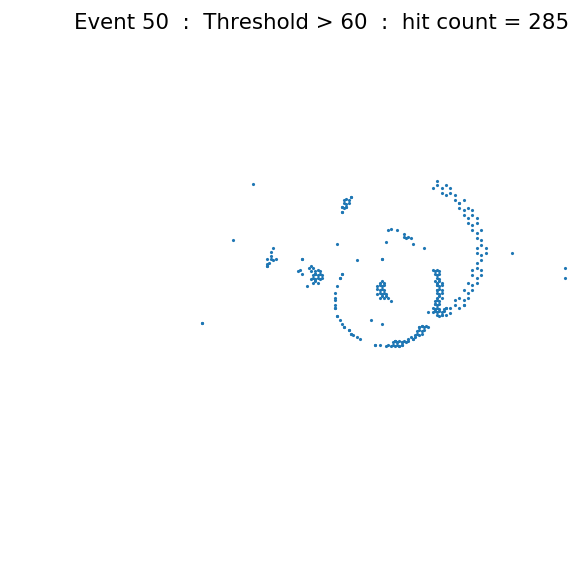

In [926]:
#x = cor_xyzs1[:, 0].flatten()
#y = cor_xyzs1[:, 1].flatten()
x = plotpoints[:, 0]
y = plotpoints[:, 1]
hitpeakcounts = len(hitpeaks)

fig = plt.figure(figsize=(5, 5), dpi=128)
plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
plt.axis('off')
plt.scatter(x, y, s=0.6)
plt.title('Event '+str(eventnum)+'  :  Threshold > '+str(threshold)+'  :  hit count = '+str(hitpeakcounts))
plt.show()

In [18]:
#===================== for event 1 ================================
trace_foreach_pad = np.ndarray(10240, dtype=object)    #list to hold arrays of trace for each pad
padnumber = 0
with h5py.File('corrected_run_0210.h5', 'r') as f:
    dset = f['get/1']                                   
    trace = dset[:,10:510]        
    for i in range(len(dset)):                          #i from 0 to 10240 for each pad
        y = np.zeros(len(trace[0]))
        padnumber = dset[i,4]                           #pad number of trace
        currentpad = trace[i]                           #select pad from dset 
        for j in range(len(trace[0])):
            y[j] = currentpad[j]
        trace_foreach_pad[padnumber] = y

## record x, y, z(time value of peak charge), charge (peak charge)

In [293]:
hitpeaks = [] 
for i in range(10240):
    trace = trace_foreach_pad[i]
    tracemax = np.amax(trace)
    tracemin = np.amin(trace)
    peaktimeindex = []
    if(tracemax - tracemin > 250):
        for j in range(len(trace)):
            if(np.max(trace) == trace[j]):
                peaktimeindex.append(j+0.0)
        for k in range(len(peaktimeindex)):
            peaktime = peaktimeindex[k]
            hitpeaks.append([peaktime, tracemax, i + 0.0]) 
                             #  time     charge   padnumber
np.asarray(hitpeaks)

array([[ 372.,  596.,    0.],
       [ 372., 1250.,   10.],
       [ 372., 1228.,   11.],
       [ 373., 1116.,   47.],
       [ 373.,  661.,   48.],
       [ 373., 1159.,   49.],
       [ 373., 1144.,   50.],
       [ 373., 1064.,   51.],
       [ 373.,  691.,   52.],
       [ 347.,  879.,  141.],
       [ 365., 1122.,  142.],
       [ 366., 1122.,  142.],
       [ 331., 1482.,  143.],
       [ 368., 1073.,  144.],
       [ 346.,  798.,  145.],
       [ 328., 1533.,  146.],
       [ 320.,  702.,  148.],
       [ 321.,  702.,  148.],
       [ 371.,  530.,  301.],
       [ 372.,  734.,  311.],
       [ 372., 1089.,  312.],
       [ 372.,  819.,  313.],
       [ 372.,  643.,  314.],
       [ 372.,  712.,  337.],
       [ 373.,  784.,  338.],
       [ 372.,  850.,  340.],
       [ 373.,  641.,  341.],
       [ 373., 1124.,  342.],
       [ 373., 1103.,  344.],
       [ 373.,  610.,  347.],
       [ 323.,  659.,  440.],
       [ 319.,  632.,  443.],
       [ 318.,  693.,  445.],
       [ 1

## I want to run through the peaks only file i was given to take each of the 10240 pad x & y coordinates to save for future use

In [165]:
#list of event names to extract data for each event from the h5 file
reduced_events = []
for i in range(2699): 
    reduced_events.append('reduced_get_events/'+str(i))

##### padcoordinates: holds the pad coordinates for each pad(i) 
##### padset: disallows duplicates to cut down on run time and track how many pads coordinates have been saved

In [220]:
padcoordinates = np.zeros(shape=(10240, 2))
padset = set()

In [266]:
with h5py.File('run_0085_peaks.h5', 'r') as f:
    for reduced_event in reduced_events:
        if(len(padset) == 10240 or reduced_event == 'reduced_get_events/2698'):
            print('====================')
            print('break:')
            print('len(padset):  ',len(padset))
            print('reduced_event:  ',reduced_event)
            break
        else:
            dset = f[reduced_event]
            for i in range(len(dset)):
                padnum = int(dset[i][4])
                if(padnum not in padset):
                    padset.add(padnum)
                    x = dset[i][0]
                    y = dset[i][1]
                    padcoordinates[padnum] = [x, y]

break:
len(padset):   8858
reduced_event:   reduced_get_events/2698


In [ ]:
# for i in range(len(padcoordinates)):
#     if(padcoordinates[i][0] > 0 or padcoordinates[i][0] < -0.1):
#         print('padnum: ',i)
#         print('padcoor:',padcoordinates[i])
#         print('')

## combine these arrays to create the array peaksh5array 
1) hitpeaks contains [time, charge, padnum] for event 1

2) padcoordinates contains [x, y] for each padnum based on index

In [301]:
peaksh5array = np.zeros(shape=(len(hitpeaks),5))

In [306]:
#insert the time, charge, and padnumbers from hitpeaks
for i in range(len(hitpeaks)):
    peaksh5array[i][2] = hitpeaks[i][0] #time value
    peaksh5array[i][3] = hitpeaks[i][1] #peak charge value
    peaksh5array[i][4] = hitpeaks[i][2] #pad number

In [309]:
#insert x & y values into peaksh5array
for i in range(len(hitpeaks)):
    padnum = int(peaksh5array[i][4])
    peaksh5array[i][0] = padcoordinates[padnum][0] #x coordinate
    peaksh5array[i][1] = padcoordinates[padnum][1] #y coordinate

## now write a _peaks.h5 file using peaksh5array

In [317]:
#original h5 file name is 'run_0210.h5'
h5 = h5py.File('corrected_run_0210_peaks.h5', 'w')
#for i in range(74):
#name = 'get/'+str(i+1)
h5.create_dataset('reduced_get_event/1', data=peaksh5array)
h5.close()

## Plot the peaks only h5 file

In [318]:
events = pytpc.HDFDataFile('corrected_run_0210_peaks.h5', 'r')
event = events[1]
xyzs = event.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=False,
                  baseline_correction=False, cg_times=False)
x = xyzs[:, 0].flatten()
y = xyzs[:, 1].flatten()
#padnumber = xyzs[:, 3].flatten()

ValueError: Unable to create group (no write intent on file)

In [315]:
print(xyzs[5043])
#print(xyzs[511])
#print(xyzs[10000])
#print(xyzs[10240])

[-112.88940844  -53.80778014 1838.72        286.        ]


In [ ]:
fig = plt.figure(figsize=(1, 1), dpi=128)
plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
plt.axis('off')
plt.scatter(x, z, s=0.6)
plt.show()

In [15]:
hits = 0
for i in range(len(hitpeaks)):
    print(hitpeaks[i])
    if(hitpeaks[i][0] != 0):
        hits += 1

[596 333 263]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1250  394  856]
[1228  398  830]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1116  398  718]
[661 341 320]
[1159  340  819]
[1144  241  903]
[1064  267  797]
[691 361 330]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[847 407 440]
[949 423 526]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[1224  480  744]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[734 418 316]
[835 395 440]
[947 421 526]
[658 343 315]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[687 411 276]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0

In [10]:
print(hits)

139
